# Mean circumpolar basal melt rates and pattern

In [9]:
# load roms history output as Xarray dataset
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
import numpy as np

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_dir)

# import my methods, make sure they get reloded by each call
from features.roms_ds import make_cartesian_grid_3D
%aimport features.roms_ds

In [61]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_TNUDGE_3','ocean_avg_0006.nc')
ds = xr.open_mfdataset(file_path)

In [62]:
ds['m'] = ds.m*(3600*24*365) #m/s -> m/a

/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


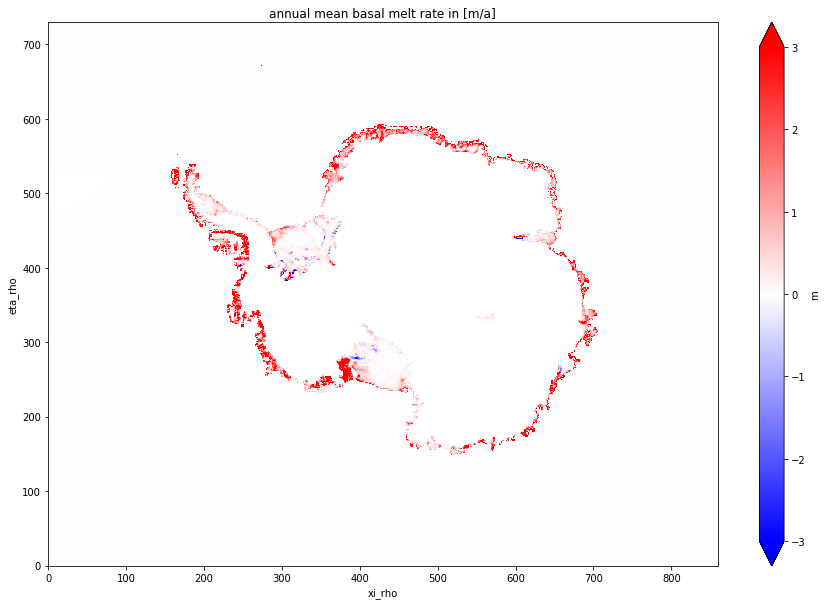

In [63]:
plt.close()
ds.m.mean('ocean_time').plot(cmap=plt.cm.bwr,size=10,vmin=-3,vmax=3)
plt.title('annual mean basal melt rate in [m/a]')
plt.show()

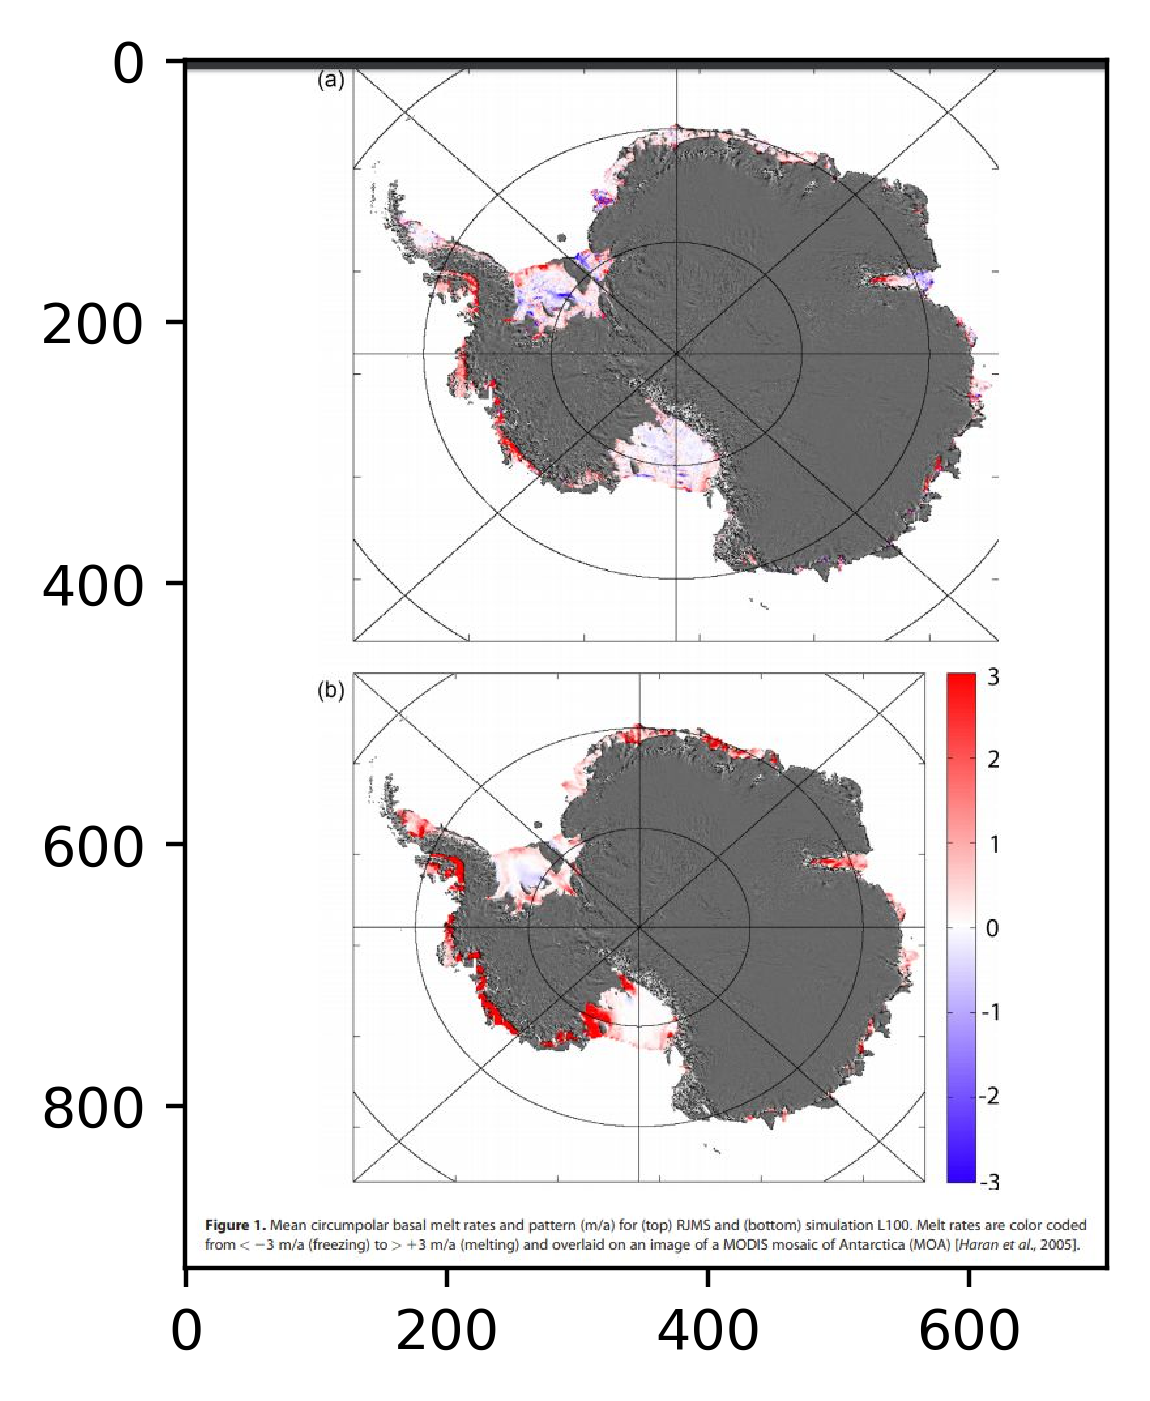

In [14]:
filename = '../../reports/figures/bm_schodlok.png'
image = plt.imread(filename)

plt.close()
plt.figure(dpi=400)
plt.imshow(image)

# Total basal mass loss

In [64]:
ds = make_cartesian_grid_3D(ds)
dA = ds.dx*ds.dy
bmb = dA[0]*ds.m.mean("ocean_time")*1000*(10**(-12)) #Gt/a
plt.close()
print('Basal mass loss [Gt/a]: ',bmb.where(ds.zice < 0.0).sum().values)

Basal mass loss [Gt/a]:  2649.283038757024


/home/ubuntu/bigStick/anaconda3/envs/tidal_melting/lib/python3.6/site-packages/dask/array/numpy_compat.py:46: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


# basal mass loss of major ice shelves

In [55]:
from scipy.spatial import KDTree
from matplotlib.patches import Rectangle

# Load the "autoreload" extension
%load_ext autoreload
# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.environ.get('projdir'),'src')
sys.path.append(src_dir)

# import my methods, make sure they get reloded by each call
from features.roms_ds import make_3D_XiEta, make_cartesian_grid_3D
%aimport features.roms_ds

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
file_path = os.path.join(os.environ.get('rawdir'),'waom10_TNUDGE_3','ocean_avg_000?.nc')

print('Load files: ',file_path)
ds = xr.open_mfdataset(file_path,data_vars="minimal",chunks={'xi_rho':100,'eta_rho':100})

Load files:  /home/ubuntu/bigStick/tidal_melting/data/analysis/raw/waom10_TNUDGE_3/ocean_avg_000?.nc


KeyboardInterrupt: 

In [5]:
names = ['All Ice Shelves', 'Larsen D Ice Shelf', 'Larsen C Ice Shelf', 'Wilkins & George VI & Stange Ice Shelves', 'Ronne-Filchner Ice Shelf', 'Abbot Ice Shelf', 'Pine Island Glacier Ice Shelf', 'Thwaites Ice Shelf', 'Dotson Ice Shelf', 'Getz Ice Shelf', 'Nickerson Ice Shelf', 'Sulzberger Ice Shelf', 'Mertz Ice Shelf', 'Totten & Moscow University Ice Shelves', 'Shackleton Ice Shelf', 'West Ice Shelf', 'Amery Ice Shelf', 'Prince Harald Ice Shelf', 'Baudouin & Borchgrevink Ice Shelves', 'Lazarev Ice Shelf', 'Nivl Ice Shelf', 'Fimbul & Jelbart & Ekstrom Ice Shelves', 'Brunt & Riiser-Larsen Ice Shelves', 'Ross Ice Shelf']
lon_min = [-180, -62.67, -65.5, -79.17, -85, -104.17, -102.5, -108.33, -114.5, -135.67, -149.17, -155, 144, 115, 94.17, 80.83, 65, 33.83, 19, 12.9, 9.33, -10.05, -28.33, -180, 158.33]
lon_max = [180, -59.33, -60, -66.67, -28.33, -88.83, -99.17, -103.33, -111.5, -114.33, -140, -145, 146.62, 123.33, 102.5, 89.17, 75, 37.67, 33.33, 16.17, 12.88, 7.6, -10.33, -146.67, 180]
lat_min = [-90, -73.03, -69.35, -74.17, -83.5, -73.28, -75.5, -75.5, -75.33, -74.9, -76.42, -78, -67.83, -67.17, -66.67, -67.83, -73.67, -69.83, -71.67, -70.5, -70.75, -71.83, -76.33, -85, -84.5]
lat_max = [-30, -69.37, -66.13, -69.5, -74.67, -71.67, -74.17, -74.67, -73.67, -73, -75.17, -76.41, -66.67, -66.5, -64.83, -66.17, -68.33, -68.67, -68.33, -69.33, -69.83, -69.33, -71.5, -77.77, -77]
obs_ismr = [0.85, 0.1, 0.4, 3.1, 0.3, 1.7, 16.2, 17.7, 7.8, 4.3, 0.6, 1.5, 1.4, 7.7, 2.8, 1.7, 0.6, -0.4, 0.4, 0.7, 0.5, 0.5, 0.1, 0.1]
obs_ismr_error = [0.1, 0.6, 1, 0.8, 0.1, 0.6, 1, 1, 0.6, 0.4, 0.3, 0.3, 0.6, 0.7, 0.6, 0.7, 0.4, 0.6, 0.4, 0.2, 0.2, 0.2, 0.2, 0.1]
rho_ice = 916

In [6]:
ds = make_3D_XiEta(ds)

xi_flat = ds.xi_3d[30].stack(xieta=('xi_rho','eta_rho'))
eta_flat = ds.eta_3d[30].stack(xieta=('xi_rho','eta_rho'))
points = np.column_stack((xi_flat.lat_rho.values,eta_flat.lon_rho.values))
tree = KDTree(points)

target = np.column_stack((lat_min,lon_min))
dist,ind  = tree.query(target)

xi_min = xi_flat[ind]
eta_min = eta_flat[ind]

target = np.column_stack((lat_max,lon_max))
dist,ind  = tree.query(target)

xi_max = xi_flat[ind]
eta_max = eta_flat[ind]

height = eta_max.values-eta_min.values
width = xi_max.values-xi_min.values

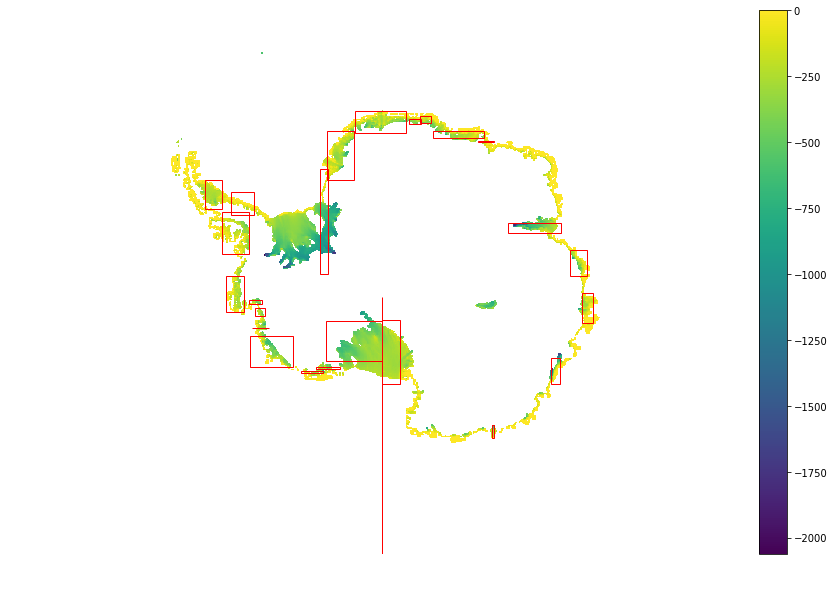

In [10]:
plt.close()
fig,ax1 = plt.subplots(figsize=(15,10))
ds.zice.where(ds.mask_rho).where(ds.zice<0.0).plot(ax=ax1)
ax1.axis('off')
for nb in np.arange(xi_min.size):
    ax1.add_patch(Rectangle((xi_min[nb].values, eta_min[nb].values), width[nb], height[nb], fill=False,color="r"))
plt.show()

In [ ]:
ds = make_cartesian_grid_3D(ds)
dA = ds.dx * ds.dy.where(ds.mask_rho)

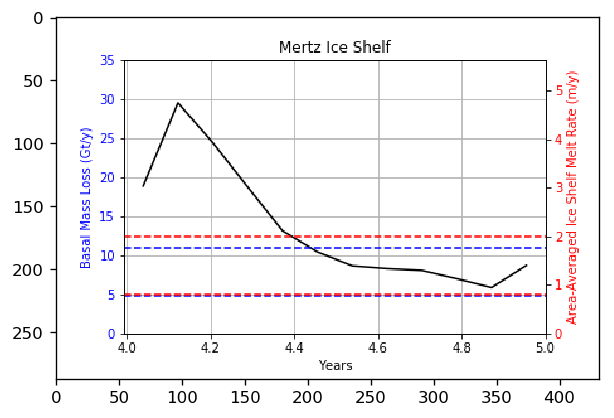

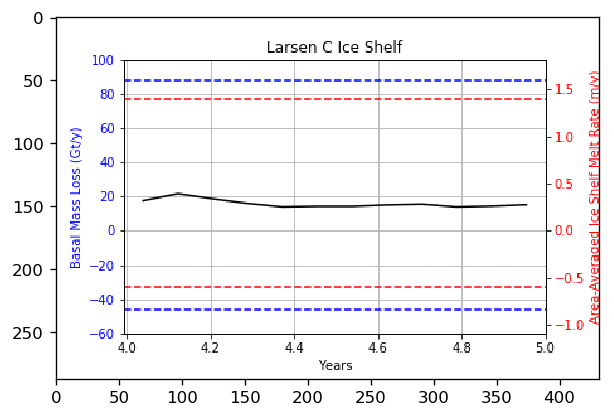

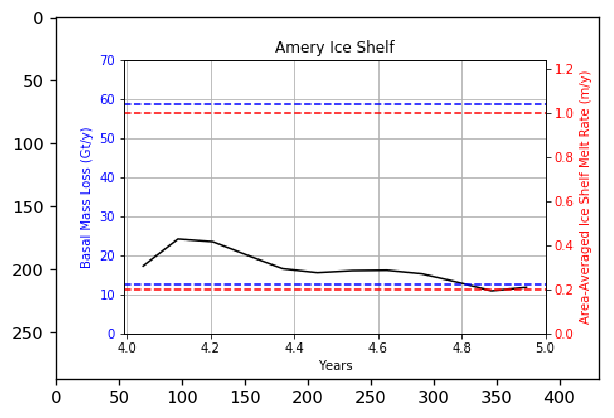

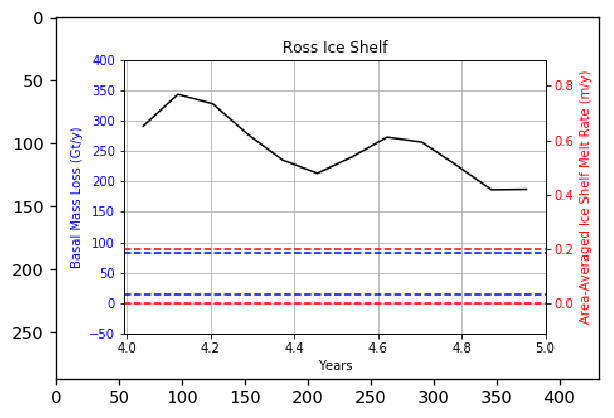

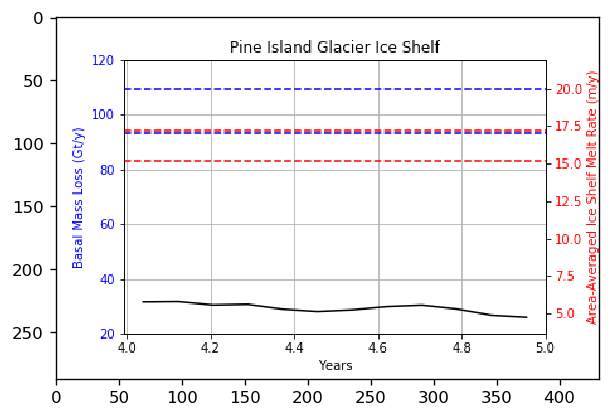

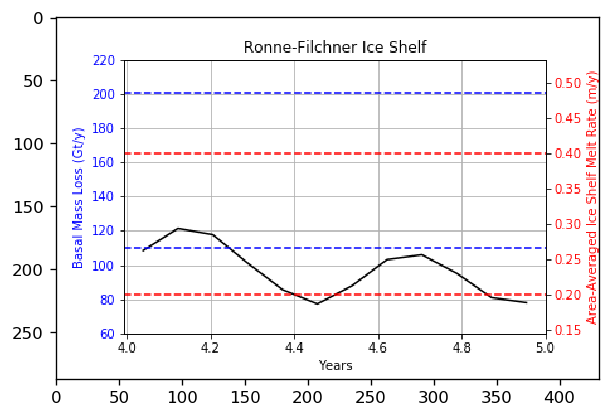

In [59]:
from glob import glob
def process(filename):
    image = plt.imread(filename)
    
    plt.figure(dpi=120)
    plt.imshow(image)
    
files = glob('../../reports/figures/massloss/*')    
for file in files:
    process(file)
